# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [5]:
#get the API data in json format
btc_url_js = btc_url + "?format=json"
btc_url_js

'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json'

In [6]:
# Fetch current BTC price
requests.get(btc_url_js)
btc_response= requests.get(btc_url_js)
btc_content = btc_response.content
print(btc_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18636962,\n\t\t\t"total_supply": 18636962,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 50693.0000000000000000,\n\t\t\t\t\t"volume_24h": 120048978372,\n\t\t\t\t\t"market_cap": 944758896227,\n\t\t\t\t\t"percentage_change_1h": 0.2351775893756450,\n\t\t\t\t\t"percentage_change_24h": 0.6535790886549510,\n\t\t\t\t\t"percentage_change_7d": 2.9542451724527600,\n\t\t\t\t\t"percent_change_1h": 0.2351775893756450,\n\t\t\t\t\t"percent_change_24h": 0.6535790886549510,\n\t\t\t\t\t"percent_change_7d": 2.9542451724527600\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1614141893\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1614141893,\n\t\t"num_cryptocurrencies": 1362,\n\t\t"error": null\n\t}\n}'


In [7]:
# read th json format data with python
btc_price=btc_response.json()
print(json.dumps(btc_price, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18636962,
            "total_supply": 18636962,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 50693.0,
                    "volume_24h": 120048978372,
                    "market_cap": 944758896227,
                    "percentage_change_1h": 0.235177589375645,
                    "percentage_change_24h": 0.653579088654951,
                    "percentage_change_7d": 2.95424517245276,
                    "percent_change_1h": 0.235177589375645,
                    "percent_change_24h": 0.653579088654951,
                    "percent_change_7d": 2.95424517245276
                }
            },
            "last_updated": 1614141893
        }
    },
    "metadata": {
        "timestamp": 1614141893,
        "num_cryp

In [18]:
# get the current price of bitcoin
btc_current_price = btc_price['data']['1']['quotes']['USD']['price']
print(f'The current price of bit coin is ${btc_current_price:,}')

The current price of bit coin is $50,693.0


In [19]:
# get the data in json format
eth_url_js = eth_url + "?format=json"
eth_url_js

'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json'

In [20]:
# Fetch current ETH price
requests.get(eth_url)
eth_response= requests.get(eth_url)
eth_content = eth_response.content
print(eth_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 114798340,\n\t\t\t"total_supply": 114798340,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 1628.2200000000000000,\n\t\t\t\t\t"volume_24h": 64528470017,\n\t\t\t\t\t"market_cap": 186711989377,\n\t\t\t\t\t"percentage_change_1h": -1.1224320461415500,\n\t\t\t\t\t"percentage_change_24h": 0.9194317376436320,\n\t\t\t\t\t"percentage_change_7d": -8.6591996943176700,\n\t\t\t\t\t"percent_change_1h": -1.1224320461415500,\n\t\t\t\t\t"percent_change_24h": 0.9194317376436320,\n\t\t\t\t\t"percent_change_7d": -8.6591996943176700\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 2048.30076,\n\t\t\t\t\t"volume_24h": 81176815281.386,\n\t\t\t\t\t"market_cap": 234883682636.266,\n\t\t\t\t\t"percent_change_1h": -1.1224320461415500,\n\t\t\t\t\t"percent_change_24h": 0.9194317376436320,\n\t\t\t\t\t

In [21]:
# read the json format data with python 
eth_price=eth_response.json()
print(json.dumps(eth_price, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114798340,
            "total_supply": 114798340,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1628.22,
                    "volume_24h": 64528470017,
                    "market_cap": 186711989377,
                    "percentage_change_1h": -1.12243204614155,
                    "percentage_change_24h": 0.919431737643632,
                    "percentage_change_7d": -8.65919969431767,
                    "percent_change_1h": -1.12243204614155,
                    "percent_change_24h": 0.919431737643632,
                    "percent_change_7d": -8.65919969431767
                },
                "CAD": {
                    "price": 2048.30076,
                    "volume_24h": 81176815281.386,
                 

In [22]:
# get the current price of ETH
eth_current_price = eth_price['data']['1027']['quotes']['USD']['price']
print(f'The current price of ETH is $ {eth_current_price:,}')

The current price of ETH is $ 1,628.22


In [37]:
# Compute current value of my crpto
my_btc_value = (my_btc * btc_current_price)
my_eth_value = (my_eth * eth_current_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $60,831.60
The current value of your 5.3 ETH is $8,629.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [38]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [39]:
# Set Alpaca API key and secret
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")


In [58]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-02-23", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-02-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
ticker_data.head()
# Preview DataFrame

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2020-09-29 00:00:00-04:00  118.28  118.33  118.2100  118.23  3982030  333.97   
2020-09-30 00:00:00-04:00  118.26  118.26  117.9516  118.07  5314447  333.09   
2020-10-01 00:00:00-04:00  117.81  118.04  117.7500  117.99  9555596  337.69   
2020-10-02 00:00:00-04:00  118.03  118.04  117.8100  117.92  5367665  331.70   
2020-10-05 00:00:00-04:00  117.74  117.74  117.5200  117.52  4347016  336.06   

                                                                 
                               high       low   close    volume  
time                                                             
2020-09-29 00:00:00-04:00  334.7700  331.6209  332.39  40442428  
2020-09-30 00:00:00-04:00  338.2900  332.8800  334.89  78401575  
2020-10-01 00:00:00-04:00  338.7400  335.0100  337.03  77057063  
2020-10-02 00:00:00-04:00  337.0126  331.1900  333.87  72797429  
2020-10-05 00:00:00-04:00  339.9600  336.0100  339.73  38540997

In [60]:
# AGG and SPY close prices
close_prices = ticker_data.iloc[:, ticker_data.columns.get_level_values(1)=='close']
close_prices.tail()

,AGG,SPY
,close,close
time,,
2021-02-16 00:00:00-05:00,116.03,392.34
2021-02-17 00:00:00-05:00,116.28,392.43
2021-02-18 00:00:00-05:00,116.20,390.75
2021-02-19 00:00:00-05:00,115.83,390.02
2021-02-22 00:00:00-05:00,115.49,387.11


In [61]:
# idntify AGG's most recent price
agg_close_price=close_prices.iloc[-1,0]
agg_close_price

115.49

In [62]:
# idntify SPY's most recent price
spy_close_price=close_prices.iloc[-1,1]
spy_close_price

387.11

In [63]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.49
Current SPY closing price: $387.11


In [64]:
# Compute the current value of AGG
my_agg_value = my_agg*agg_close_price
my_agg_value

23098.0

In [65]:
# Compute the current value of SPY
my_spy_value=my_spy*spy_close_price
my_spy_value

19355.5

In [66]:
# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")

The current value of your 200 AGG shares is $23,098.00
The current value of your 50 SPY shares is $19,355.50


### Savings Health Analysis

In [67]:
# Set monthly household income
monthly_income=12000
# calculate asset value by category
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

#initialize a dictionary
d = {'type': ['crypto','shares'], 'values': [crypto_value, shares_value]}

# Create savings DataFrame
df=pd.DataFrame(data=d)
# Display savings DataFrame
df

,type,values
0,crypto,69461.166
1,shares,42453.500


In [68]:
# set index to "type"
df_savings=df.set_index('type')
df_savings

,values
type,
crypto,69461.166
shares,42453.500


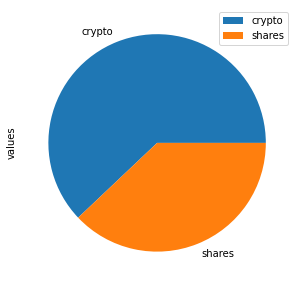

In [69]:
# Plot savings pie chart
pie=df_savings.plot.pie(y='values', figsize=(5,5))

In [70]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f'Emergency fund is $ {emergency_fund:,.2f}')

Emergency fund is $ 36,000.00


In [71]:
# Calculate total amount of savings
total_savings = df_savings['values'].sum()
print(f'Total savings is $ {total_savings:,.2f}')

Total savings is $ 111,914.67


In [72]:
# Validate saving health
# calculate the shortage
shortage = (emergency_fund - total_savings)

if total_savings > emergency_fund:
    print('Congratulations! You have enough savings')
elif total_savings == emergency_fund:
    print('Nice job. You are right on your finanial target')
else:
    print(f'You need addtional $ {shortage} to meet your financial goal')

Congratulations! You have enough savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [73]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-02-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-19', tz='America/New_York').isoformat()

In [75]:
# Get 5 years' worth of historical data for SPY and AGG
import datetime as dt

# Set the ticker
ticker = "AGG", "SPY"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
date_list = [["2016-02-20"],["2021-02-19"]]

# Find the total number of business days
limit = np.busday_count(date_list[0][0], date_list[1][0])

# Logic for data that is greater than Alpca's 1000 limit but below 2000 rows (5 year limit)
if limit > 1000: 
    newend = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1000)),"%Y-%m-%d")
    date_list[0].insert(1, newend)
    newstart = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1001)),"%Y-%m-%d")
    date_list[1].insert(0, newstart)
    ticker_data = []
    # Get AGG & SPY historical data for data greater than 1000 rows
    for i in range(2):
        data = api.get_barset(
        ticker,
        timeframe,
        start = pd.Timestamp(date_list[i][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[i][1], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
        ticker_data.append(data)
    all_ticker_data = pd.concat(ticker_data, axis="rows", join="inner")
else:
    # Get AGG & SPY historical data for data less than 1000 rows
    all_ticker_data = api.get_barset(
        ticker,
        timeframe,
        start = pd.Timestamp(date_list[0][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[1][0], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
    
# Display sample data
all_ticker_data

AGG                                     \
                               open    high       low   close   volume   
time                                                                     
2016-02-22 00:00:00-05:00  109.7700  109.88  109.7200  109.82  2239411   
2016-02-23 00:00:00-05:00  109.6300  110.00  109.5200  109.85  2148002   
2016-02-24 00:00:00-05:00  110.1200  110.32  109.8400  109.89  2339276   
2016-02-25 00:00:00-05:00  110.0900  110.31  110.0000  110.14  2178025   
2016-02-26 00:00:00-05:00  109.9000  109.97  109.8000  109.95  1891851   
...                             ...     ...       ...     ...      ...   
2021-02-12 00:00:00-05:00  116.6700  116.74  116.5418  116.58  3209765   
2021-02-16 00:00:00-05:00  116.2200  116.23  116.0200  116.03  5543350   
2021-02-17 00:00:00-05:00  116.2200  116.29  116.1450  116.28  6038386   
2021-02-18 00:00:00-05:00  116.1400  116.28  116.0300  116.20  3910324   
2021-02-19 00:00:00-05:00  116.0187  116.06  115.7515  115.83  4412312   

                              SPY                                      
                             open     high     low   close     volume  
time                                                                   
2016-02-22 00:00:00-05:00  193.87  194.950  193.79  194.79   74798121  
2016-02-23 00:00:00-05:00  194.00  194.320  192.18  192.37   87929515  
2016-02-24 00:00:00-05:00  190.63  193.530  189.32  193.22  119140590  
2016-02-25 00:00:00-05:00  193.73  195.540  192.83  195.53   86360609  
2016-02-26 00:00:00-05:00  196.57  196.680  194.90  195.13   94022841  
...                           ...      ...     ...     ...        ...  
2021-02-12 00:00:00-05:00  389.85  392.900  389.77  392.69   39697380  
2021-02-16 00:00:00-05:00  393.96  394.170  391.53  392.34   43206214  
2021-02-17 00:00:00-05:00  390.42  392.660  389.33  392.43   44671866  
2021-02-18 00:00:00-05:00  389.59  391.515  387.74  390.75   52370380  
2021-02-19 00:00:00-05:00  392.07  392.380  389.55  390.02   66437346  

[1259 rows x 10 columns]

In [76]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 years daily returns with weights 40% AGG, 60% SPY
MC = MCSimulation(portfolio_data = all_ticker_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30)

# Print the simulation input data
MC.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2016-02-22 00:00:00-05:00  109.77  109.88  109.72  109.82  2239411   
2016-02-23 00:00:00-05:00  109.63  110.00  109.52  109.85  2148002   
2016-02-24 00:00:00-05:00  110.12  110.32  109.84  109.89  2339276   
2016-02-25 00:00:00-05:00  110.09  110.31  110.00  110.14  2178025   
2016-02-26 00:00:00-05:00  109.90  109.97  109.80  109.95  1891851   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-02-22 00:00:00-05:00          NaN  193.87  194.95  193.79  194.79   
2016-02-23 00:00:00-05:00     0.000273  194.00  194.32  192.18  192.37   
2016-02-24 00:00:00-05:00     0.000364  190.63  193.53  189.32  193.22   
2016-02-25 00:00:00-05:00     0.002275  193.73  195.54  192.83  195.53   
2016-02-26 00:00:00-05:00    -0.001725  196.57  196.68  194.90  195.13   

                                                   
                              volume daily_return  
time                                               
2016-02-22 00:00:00-05:00   74798121          NaN  
2016-02-23 00:00:00-05:00   87929515    -0.012424  
2016-02-24 00:00:00-05:00  119140590     0.004419  
2016-02-25 00:00:00-05:00   86360609     0.011955  
2016-02-26 00:00:00-05:00   94022841    -0.002046

In [77]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000777,0.997663,1.013144,0.994217,0.989373,1.007198,1.000911,0.996229,1.000935,1.006623,...,0.985362,0.993362,1.002518,1.005769,1.009900,1.001895,0.997537,0.995594,1.010776,0.991377
2,1.002689,0.989902,1.020180,0.982633,0.986162,1.022364,1.002855,0.998083,1.008537,0.996449,...,0.969185,0.983820,1.008764,1.005596,1.018895,1.009973,0.991978,0.995473,1.018254,0.996425
3,1.008092,1.003584,1.030404,0.986708,0.980194,1.029982,0.995984,1.010379,1.015170,0.990247,...,0.963003,0.974012,0.998968,1.007992,1.012863,1.025532,0.998264,0.996829,1.031233,1.008282
4,1.003475,0.997705,1.042953,0.967905,0.977915,1.016905,0.991835,1.020539,1.008602,0.987707,...,0.964485,0.975990,1.016236,1.024204,1.004460,1.019298,0.995987,1.001002,1.032389,1.021024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.061699,7.725886,12.494497,11.920617,11.151678,14.018701,7.820180,12.038272,2.170237,10.601110,...,27.055055,7.472615,5.034534,39.341123,21.639887,18.507318,43.869799,27.584816,4.145300,22.162839
7557,7.075972,7.744952,12.292671,11.758173,11.261176,14.035786,7.917541,11.943658,2.141649,10.561486,...,26.987143,7.409991,5.011509,39.740404,21.626309,18.451834,44.161826,27.626562,4.140189,22.061394
7558,7.070205,7.652925,12.168488,11.606173,11.489722,14.032311,7.913253,12.095439,2.169101,10.605879,...,26.821398,7.439371,5.031928,39.846587,21.611389,18.329841,43.816726,27.586873,4.138509,22.168858
7559,7.098540,7.632522,12.168545,11.678423,11.558005,14.102909,7.900100,12.021330,2.163846,10.596103,...,26.581958,7.449004,5.061455,39.908739,21.652680,18.311040,43.770588,27.542997,4.166402,22.152216


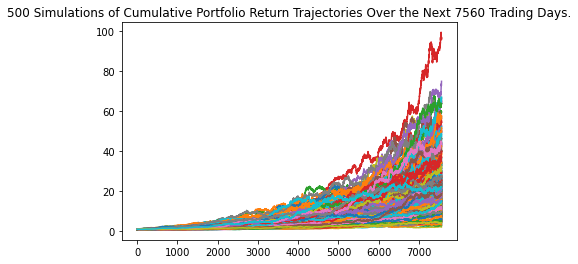

In [78]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

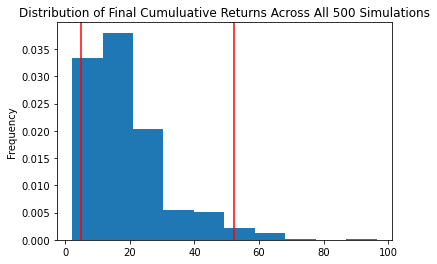

In [79]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
weighted_summary = MC.summarize_cumulative_return()

# Print summary statistics
print(weighted_summary)

count           500.000000
mean             19.176300
std              12.731324
min               2.144544
25%              10.218337
50%              15.827177
75%              24.172492
max              96.352364
95% CI Lower      4.992475
95% CI Upper     52.323681
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [83]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(weighted_summary[8]*initial_investment,2)
ci_upper = round(weighted_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $99,849.49 and $1,046,473.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [85]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(weighted_summary[8]*initial_investment,2)
ci_upper = round(weighted_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $149,774.24 and $1,569,710.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 5 years daily returns with weights 40% AGG, 60% SPY
MC_early = MCSimulation(portfolio_data = all_ticker_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*5)

# Print the simulation input data
MC_early.portfolio_data.head()


AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2016-02-22 00:00:00-05:00  109.77  109.88  109.72  109.82  2239411   
2016-02-23 00:00:00-05:00  109.63  110.00  109.52  109.85  2148002   
2016-02-24 00:00:00-05:00  110.12  110.32  109.84  109.89  2339276   
2016-02-25 00:00:00-05:00  110.09  110.31  110.00  110.14  2178025   
2016-02-26 00:00:00-05:00  109.90  109.97  109.80  109.95  1891851   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-02-22 00:00:00-05:00          NaN  193.87  194.95  193.79  194.79   
2016-02-23 00:00:00-05:00     0.000273  194.00  194.32  192.18  192.37   
2016-02-24 00:00:00-05:00     0.000364  190.63  193.53  189.32  193.22   
2016-02-25 00:00:00-05:00     0.002275  193.73  195.54  192.83  195.53   
2016-02-26 00:00:00-05:00    -0.001725  196.57  196.68  194.90  195.13   

                                                   
                              volume daily_return  
time                                               
2016-02-22 00:00:00-05:00   74798121          NaN  
2016-02-23 00:00:00-05:00   87929515    -0.012424  
2016-02-24 00:00:00-05:00  119140590     0.004419  
2016-02-25 00:00:00-05:00   86360609     0.011955  
2016-02-26 00:00:00-05:00   94022841    -0.002046

In [87]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008273,1.009360,1.004825,1.018637,1.005609,0.993131,0.993108,0.990786,0.995340,1.008178,...,0.994935,0.996599,1.004391,1.006483,1.007844,1.010086,1.005748,0.997117,1.005244,1.003158
2,1.014925,1.006814,1.004533,1.015134,0.993427,0.997111,0.987939,0.986704,0.990200,1.007249,...,1.010188,0.995744,0.998051,0.997801,0.997804,1.009450,1.009082,0.988207,1.007625,1.012486
3,1.018692,1.005001,1.008395,1.021846,1.000382,1.001833,0.985892,0.971778,0.990489,1.010195,...,1.015561,0.989938,1.000696,1.004765,1.001370,1.010389,1.016251,0.990757,1.004809,1.023941
4,1.023789,1.011194,1.009724,1.032942,0.996648,1.009718,0.993070,0.960958,0.987645,1.015948,...,1.024919,0.991341,1.009166,0.989634,1.001256,1.029036,1.005904,0.981657,1.009820,1.020513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.688113,2.022958,2.017531,1.388634,2.633068,1.165208,1.422335,1.417279,1.096582,1.833432,...,1.359979,2.786269,2.048832,1.584999,0.962425,1.817275,0.967702,1.913045,1.095878,1.798613
1257,1.695516,2.012879,2.045278,1.398269,2.647201,1.164637,1.405396,1.428640,1.101973,1.836816,...,1.353551,2.768727,2.048941,1.585718,0.970337,1.812552,0.961317,1.908482,1.090016,1.792267
1258,1.692589,1.999244,2.054550,1.403755,2.628054,1.168439,1.408874,1.412950,1.096129,1.824160,...,1.360624,2.770823,2.060657,1.585631,0.975358,1.806557,0.953653,1.896037,1.082095,1.782582
1259,1.704361,2.026404,2.041680,1.424269,2.611237,1.170069,1.427827,1.412425,1.093902,1.810218,...,1.362856,2.751938,2.070598,1.582538,0.979834,1.798792,0.950412,1.901967,1.073275,1.750531


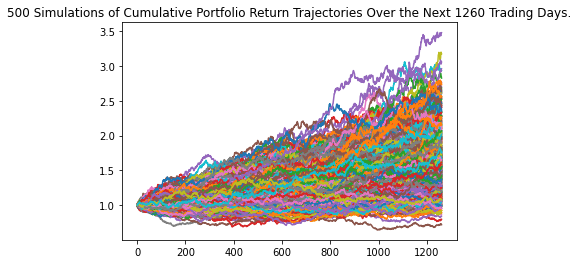

In [88]:
# Plot simulation outcomes
line_plot_early = MC_early.plot_simulation()

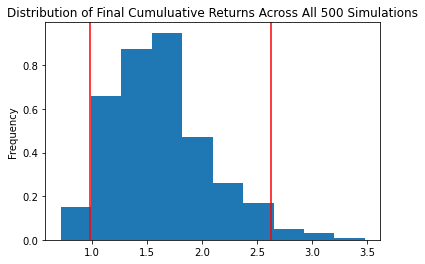

In [89]:
# Plot probability distribution and confidence intervals
dist_plot_early = MC_early.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
early_summary = MC_early.summarize_cumulative_return()

# Print summary statistics
print(early_summary)

count           500.000000
mean              1.624157
std               0.442391
min               0.719032
25%               1.309591
50%               1.568181
75%               1.851977
max               3.477184
95% CI Lower      0.982102
95% CI Upper      2.627354
Name: 1260, dtype: float64


In [91]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(early_summary[8]*initial_investment,2)
ci_upper_five = round(early_summary[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,} and ${ci_upper_five:,}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $58,926.11 and $157,641.21


### Ten Years Retirement Option

In [93]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(portfolio_data = all_ticker_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*10)

# Print the simulation input data
MC_ten.portfolio_data.head()


AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2016-02-22 00:00:00-05:00  109.77  109.88  109.72  109.82  2239411   
2016-02-23 00:00:00-05:00  109.63  110.00  109.52  109.85  2148002   
2016-02-24 00:00:00-05:00  110.12  110.32  109.84  109.89  2339276   
2016-02-25 00:00:00-05:00  110.09  110.31  110.00  110.14  2178025   
2016-02-26 00:00:00-05:00  109.90  109.97  109.80  109.95  1891851   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-02-22 00:00:00-05:00          NaN  193.87  194.95  193.79  194.79   
2016-02-23 00:00:00-05:00     0.000273  194.00  194.32  192.18  192.37   
2016-02-24 00:00:00-05:00     0.000364  190.63  193.53  189.32  193.22   
2016-02-25 00:00:00-05:00     0.002275  193.73  195.54  192.83  195.53   
2016-02-26 00:00:00-05:00    -0.001725  196.57  196.68  194.90  195.13   

                                                   
                              volume daily_return  
time                                               
2016-02-22 00:00:00-05:00   74798121          NaN  
2016-02-23 00:00:00-05:00   87929515    -0.012424  
2016-02-24 00:00:00-05:00  119140590     0.004419  
2016-02-25 00:00:00-05:00   86360609     0.011955  
2016-02-26 00:00:00-05:00   94022841    -0.002046

In [94]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995974,0.984598,1.000355,0.999384,0.987378,1.005162,1.008269,1.009078,1.005473,1.017131,...,1.001406,0.997890,0.993489,1.002249,0.998429,1.009566,1.003860,1.008527,1.017231,0.993494
2,1.007351,0.981751,0.994124,0.998937,0.984341,1.003525,1.022354,1.013704,1.010598,1.018818,...,0.997502,0.987381,0.995460,1.011677,1.001944,0.994906,1.001441,1.000529,1.017108,0.994476
3,0.997233,0.983855,0.984097,0.996251,0.979839,1.006261,1.023929,1.014614,1.012580,1.018089,...,1.010630,0.996336,0.990369,0.996329,0.984443,0.990991,0.996503,1.000637,1.020314,0.985937
4,0.995592,0.988175,0.982029,1.001497,0.978155,1.007250,1.032277,1.014589,1.020048,1.019453,...,1.008750,1.007560,0.998334,0.993281,0.980163,0.984938,0.993182,1.000261,1.010244,0.979975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.187761,2.032849,2.456158,2.297598,2.204093,1.754323,4.470637,3.343316,3.364120,2.877277,...,2.180858,4.727741,2.395236,1.954538,3.489537,2.442865,1.903118,2.686202,3.010101,2.938376
2517,3.186950,2.033114,2.465418,2.281626,2.188083,1.753383,4.508612,3.299910,3.356568,2.873002,...,2.145723,4.689592,2.387264,1.956456,3.450516,2.435136,1.914913,2.719871,3.008214,2.942445
2518,3.239944,2.057499,2.446212,2.281111,2.172087,1.734186,4.507229,3.250263,3.333654,2.855819,...,2.152479,4.699902,2.411623,1.936029,3.452449,2.417402,1.922507,2.722733,3.036153,2.935664
2519,3.232028,2.063740,2.462768,2.264858,2.171219,1.721102,4.561450,3.273299,3.286995,2.901703,...,2.163458,4.724792,2.391956,1.935607,3.462935,2.449510,1.932392,2.739642,3.052067,2.943623


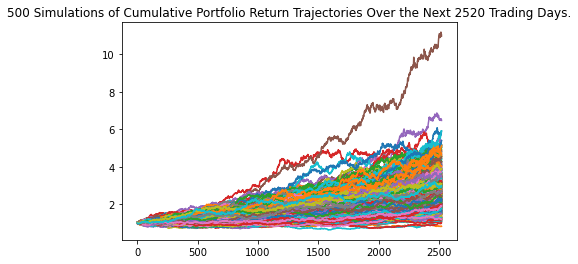

In [95]:
# Plot simulation outcomes
line_plot_ten = MC_ten.plot_simulation()

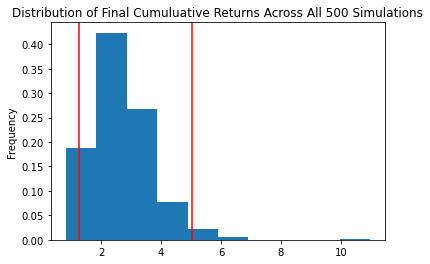

In [96]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten.plot_distribution()

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_ten = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_ten)

count           500.000000
mean              2.691240
std               1.011576
min               0.822346
25%               1.994987
50%               2.515150
75%               3.225088
max              10.971176
95% CI Lower      1.263536
95% CI Upper      5.040983
Name: 2520, dtype: float64


In [98]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,} and ${ci_upper_ten:,}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $75,812.15 and $302,458.97
